In [1]:
import pandas as pd
import seaborn as sns

pd.options.display.max_columns = None
pd.options.display.max_rows = None

data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [2]:
# Questions:

## 1. Are males or females more likely to die from heart failure?
## 2. What is the average age that people are prone to heart failure?
## 3. What is the average ejection fraction from survival of heart failure?
## 4. Is survival more likely with lower or high serum creatinine?
## 5. Is diabetes more common in males or females?
## 6. Is high blood pressure more common in males or females?
## 7. Is anemia more common in males or females?
## 8. According to the John Hopkins Medicine, having too many platelets in your blood can lead to things like a heart attack or stroke. A normal range is 150,000 to 450,000, how many people have higher than normal platelets count? (https://www.hopkinsmedicine.org/health/conditions-and-diseases/what-are-platelets-and-why-are-they-important)
## 9. What is the average level of creatinine phosphokinase in people who survived and those who did not?
## 10. What is the average of serum sodium?

In [3]:
## Question 1: Are males or females more likely to die from heart failure?

In [4]:
sex = None
male_deaths = data[(data["DEATH_EVENT"] == 1) & (data["sex"] == 0)]["DEATH_EVENT"].sum()
female_deaths = data[(data["DEATH_EVENT"] == 1) & (data["sex"] == 1)]["DEATH_EVENT"].sum()

if male_deaths > female_deaths:
    sex = "Male"
else:
    sex = "Female"
    
sex

'Female'

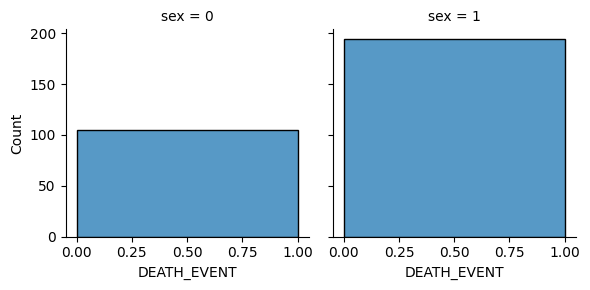

In [5]:
graph = sns.FacetGrid(data, col = "sex")
graph.map_dataframe(sns.histplot, x = "DEATH_EVENT", bins = 1)

In [6]:
### Answer 1: Based on the code above and the dataset I chose, females are more likely to die from a heart failure than males.

In [7]:
## Question 2: What is the average age that people are prone to heart failure?

In [8]:
avg_age = data["age"].mean()
avg_age

60.83389297658862

<AxesSubplot: xlabel='age'>

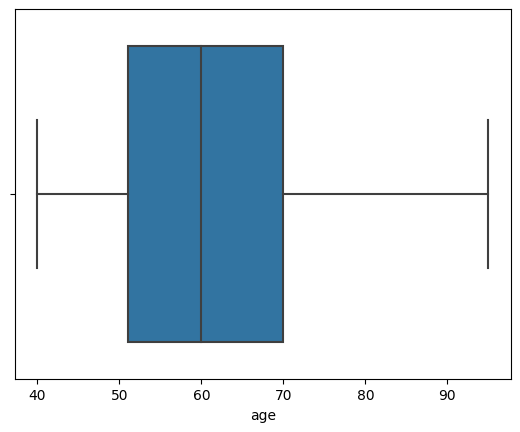

In [9]:
sns.boxplot(x = data["age"])

In [10]:
### Answer 2: The average age that people are prone to heart failure is 60.

In [11]:
## Question 3: What is the average ejection fraction from survival of heart failure?

In [12]:
avg_ejection_fraction = data[data["DEATH_EVENT"] == 0]["ejection_fraction"].mean()
avg_ejection_fraction

40.26600985221675

<AxesSubplot: xlabel='ejection_fraction'>

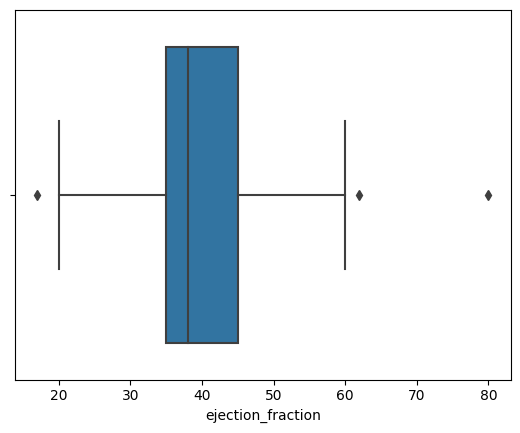

In [13]:
sns.boxplot(x =(data[data["DEATH_EVENT"] == 0]["ejection_fraction"]))

In [14]:
### Answer 3: The averge ejection fraction of the survival of heart failure is 40.26

In [15]:
## Question 4: Is survival more likely with lower or high serum creatinine?

In [16]:
creatinine_level = None

survived = data[data["DEATH_EVENT"] == 0]
not_survived = data[data["DEATH_EVENT"] == 1]

survived_creatinine_level = survived["serum_creatinine"].mean()
not_survived_creatinine_level = not_survived["serum_creatinine"].mean()

if not_survived_creatinine_level > survived_creatinine_level:
    creatinine_level = "Lower is better"
else:
    creatinine_level = "Higher is better"
    
creatinine_level

'Lower is better'

<AxesSubplot: xlabel='DEATH_EVENT', ylabel='serum_creatinine'>

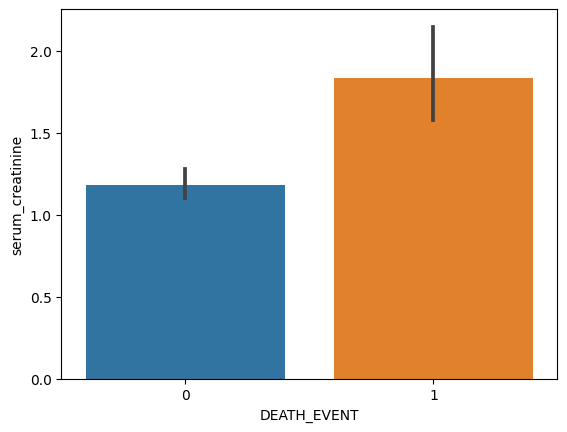

In [17]:
sns.barplot(y = data["serum_creatinine"], x = data["DEATH_EVENT"])
#0 is survived, 1 is death

In [18]:
### Answer 4: Having lower level of the serum creatinine is better for survival of heart failure than high levels.

In [19]:
## Question 5: Is diabetes more common in males or females?

In [20]:
male_diabetes = data[(data["sex"] == 0) & (data["diabetes"] == 1)]["diabetes"].sum()
female_diabetes = data[(data["sex"] == 1) & (data["diabetes"] == 1)]["diabetes"].sum()

sex_diabetes = "female" if male_diabetes < female_diabetes else "male" 

sex_diabetes

'female'

In [21]:
### Answer 5: It is more common to have diabetes in females

In [22]:
## Question 6: Is high blood pressure more common in males or females?

In [23]:
male_hbp = data[(data["sex"] == 0) & (data["high_blood_pressure"] == 1)]["high_blood_pressure"].sum()
female_hbp = data[(data["sex"] == 1) & (data["high_blood_pressure"] == 1)]["high_blood_pressure"].sum()

sex_hbp = "female" if male_hbp < female_hbp else "male"

sex_hbp

'female'

In [24]:
### Answer 6: It is more common to have high blood pressure if you are female

In [25]:
## Question 7: Is anemia more common in males or females?

In [26]:
male_anemia = data[(data["sex"] == 0) & (data["anaemia"] == 1)]["anaemia"].sum() # original data misspelled anemia
female_anemia = data[(data["sex"] == 1) & (data["anaemia"] == 1)]["anaemia"].sum()

sex_anemia = "female" if male_anemia < female_anemia else "male"

sex_anemia

'female'

In [27]:
### Answer 7: It is more common to have high blood sugar in females

In [28]:
## Question 8: According to the John Hopkins Medicine, having too many platelets in your blood can lead to things like a heart attack or stroke. A normal range is 150,000 to 450,000, how many people have higher than normal platelets count? (https://www.hopkinsmedicine.org/health/conditions-and-diseases/what-are-platelets-and-why-are-they-important)

In [29]:
max_normal_range = 450000

higher_normal = (data["platelets"] > max_normal_range).sum()

higher_normal

13

In [30]:
### Answer 8: There are 13 people who have higher than normal platelets count

In [31]:
## Question 9: What is the average level of creatinine phosphokinase in people who survived and those who did not?

In [39]:
total_people = data.shape[0]

survived_cp = data[data["DEATH_EVENT"] == 0]["creatinine_phosphokinase"]
average_survived_cp = (survived_cp.sum()) / total_people

not_survived_cp = data[data["DEATH_EVENT"] == 1]["creatinine_phosphokinase"]
average_not_survived_cp = (not_survived_cp.sum()) / total_people

print(average_survived_cp, average_not_survived_cp)

366.6588628762542 215.18060200668896


In [40]:
### Answer 9: The average level of creatinine phosphokinase who survived is 366.66 and those who did not is 215.18

In [41]:
## Question 10: What is the average of serum sodium?

In [47]:
total_serum_sodium = data["serum_sodium"].mean()
total_serum_sodium

136.62541806020067

In [ ]:
### Answer 10: The average serum sodium is 136.